This blog post will visualize the histograms of the following dice rolling algorithms ("XdY" should be interpreted as "Roll X dice with Y sides"):

* 1d2
* 1d3
* 1d4
* 1d6
* 1d8
* 1d10
* 2d6
* 2d8
* 3d6
* 3d8
* 4d6
* 4d8
* 6d6
* 6d8
* 8d6
* 8d8
* 12d6
* 12d8
* 16d6

Notice that, in general, the expected value of each dice rolling algorithm increases as we go down the list. The final results will be examined in tabular form in the Summary section.

Since the number of possible combinations for each algorithm is relatively small, we can elegantly solve this problem using Python listcomps by finding every possible combination of the dice rolls. The following code uses the Python "itertools" library to take advantage of repeated listcomps, which makes the resulting code very small:

In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement as cwr
%matplotlib inline

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

def find_hist(num_dice, dice_type):
    formula = range(1,dice_type+1)
    comb = cwr(formula, num_dice)
    res = [sum(values) for values in comb]
    return res

def plot_hist(data, title, bins):
    plt.figure()    
    sns.distplot(data, kde=False, bins=bins, fit=norm) 
    mv = np.mean(data)
    stdv = np.std(data)    
    text_str = '$\mu=%.1f$\n$\sigma=%.2f$' % (mv, stdv)
    plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes, 
             fontsize=16, verticalalignment='top', bbox=props)
    plt.title("Histogram of " + title, fontsize=14)
    plt.xlabel = 'Value'  
    plt.ylabel = 'Probability'
    return mv, round(stdv,2)

def find_plot_hist(num_dice, dice_type):
    res = find_hist(num_dice, dice_type)
    title = str(num_dice) + "d" + str(dice_type)
    # Here's a trick for making the histogram bins look very nice
    if num_dice<2:
        bins = dice_type
    else:
        bins = num_dice * dice_type - num_dice + 1
    mv, stdv = plot_hist(res, title, bins)
    return [title, mv, stdv]

Now we can iterate over all the algorithms defined in the introduction:

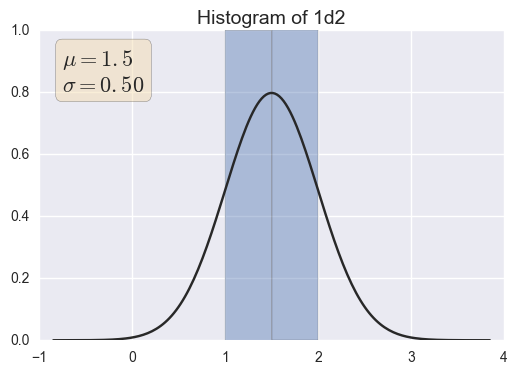

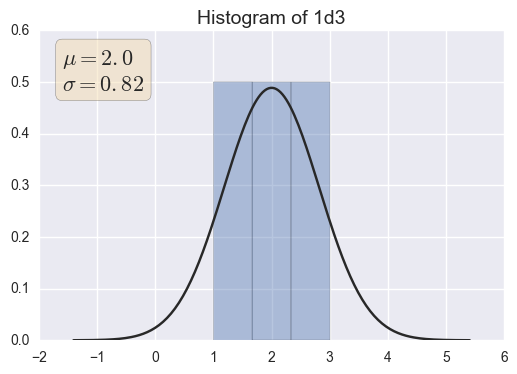

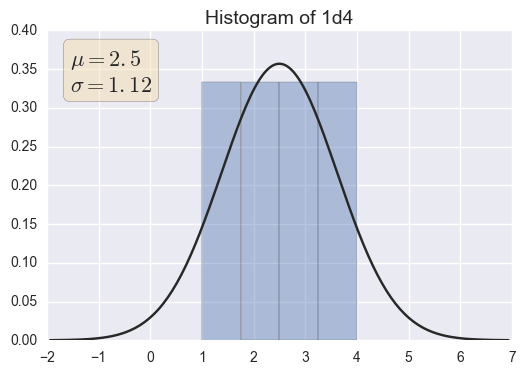

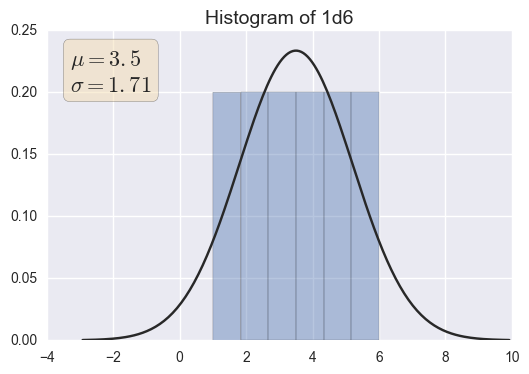

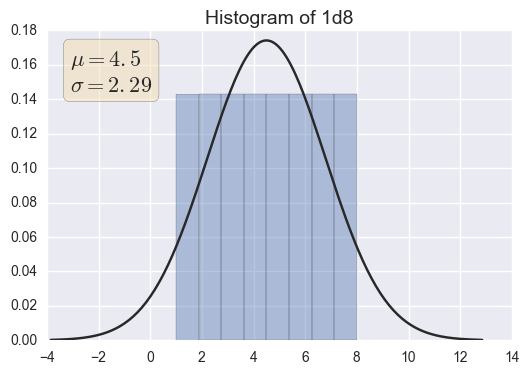

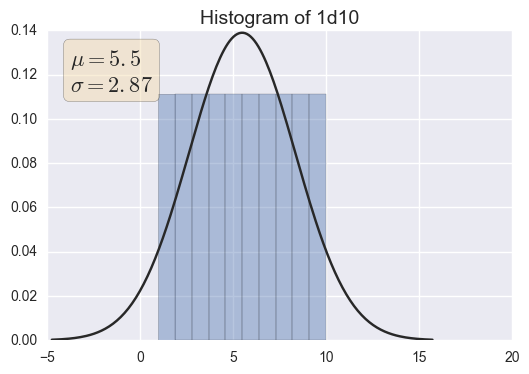

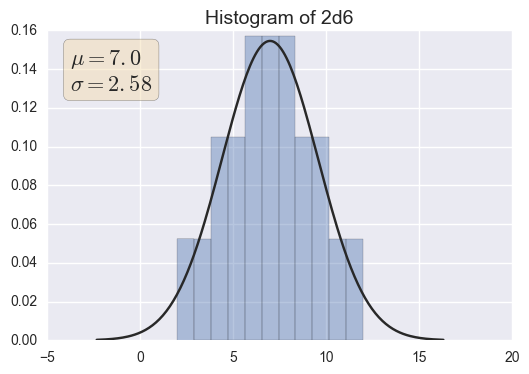

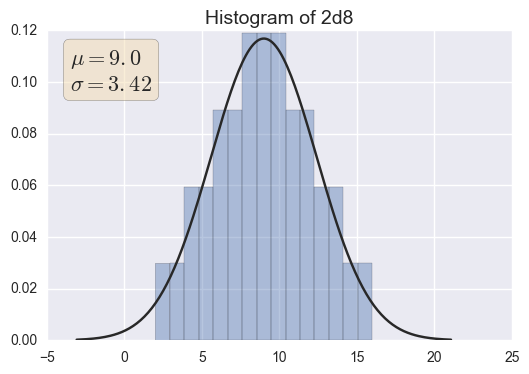

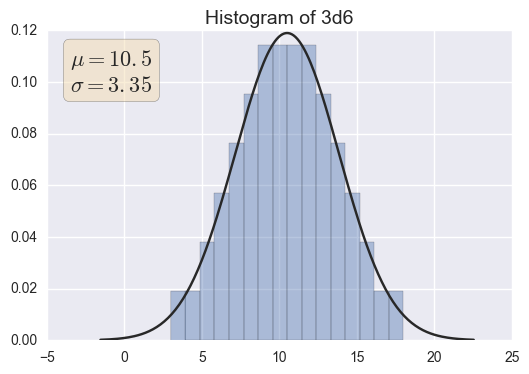

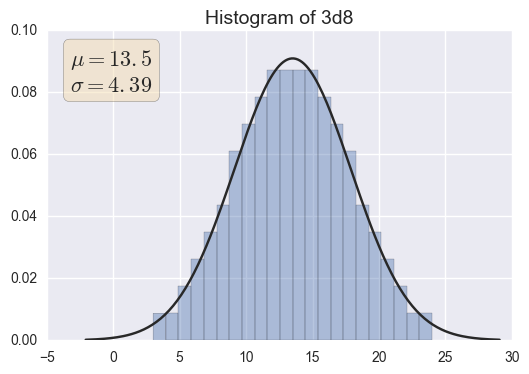

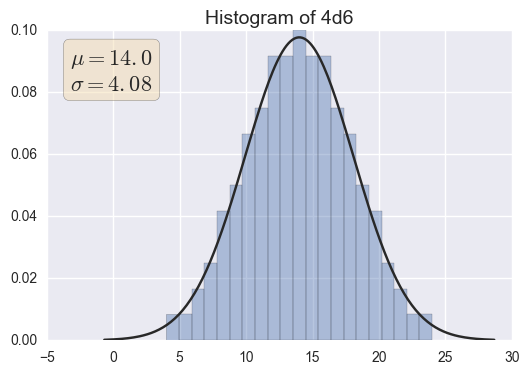

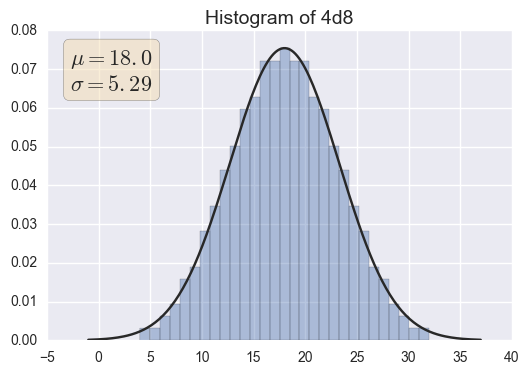

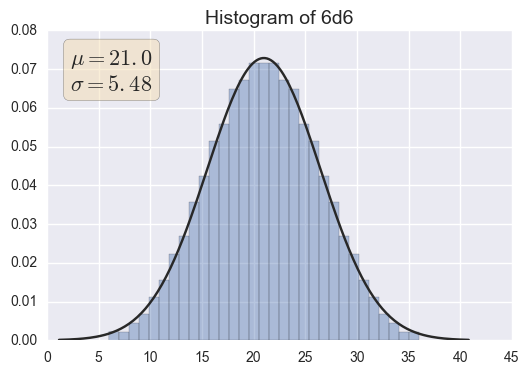

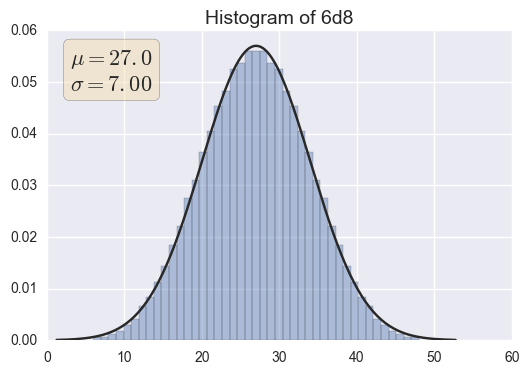

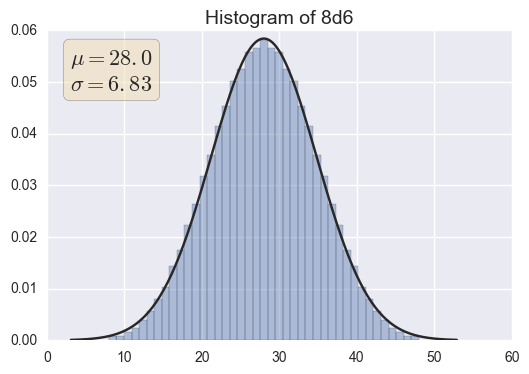

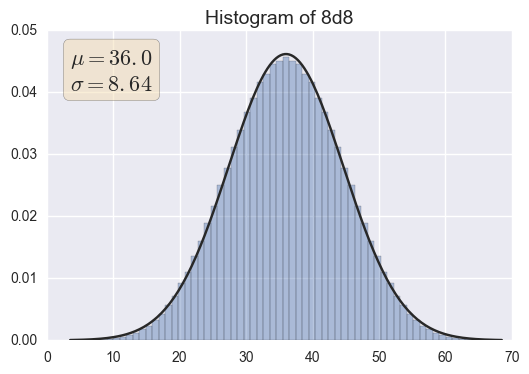

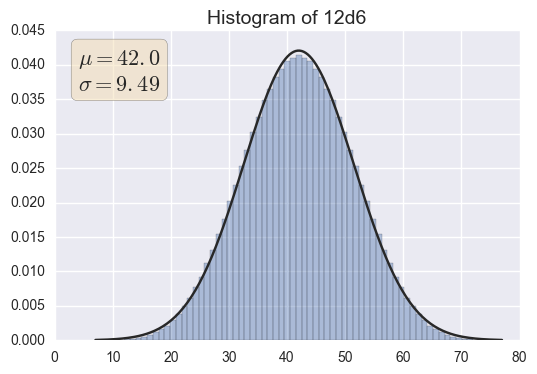

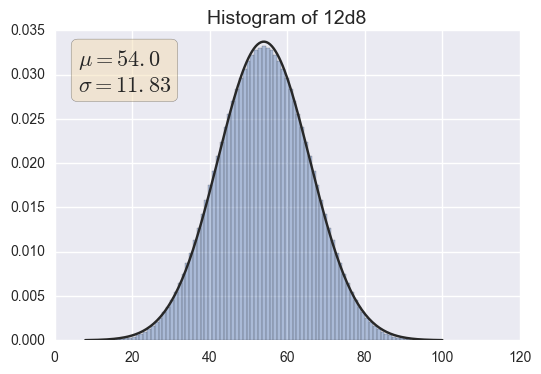

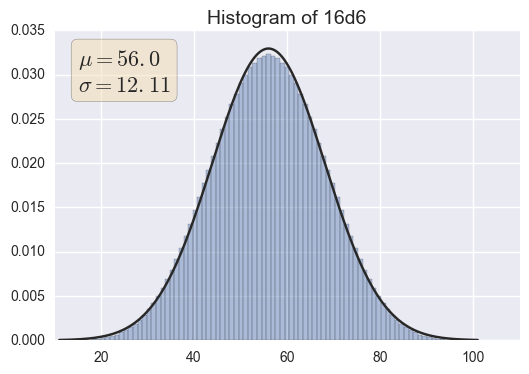

In [2]:
# The first item is the number of dice, and the second item is the dice
# type. E.g. [1,2] means 1d2
algs = [[1,2],[1,3],[1,4],[1,6],[1,8],[1,10],[2,6],[2,8],[3,6],[3,8],
        [4,6],[4,8],[6,6],[6,8],[8,6],[8,8],[12,6],[12,8],[16,6]]
results = []
# Iterate over all the algorithms, and save the results in "results"
for alg in algs:
    res = find_plot_hist(alg[0],alg[1])
    results.append(res)

Notice, of course, that the normal histogram fit is a very poor choice for the 1dX algorithms, because they are a uniform distribution. In general, the more dice you roll, the closer the resulting distribution will resemble a Gaussian distribution.

We can summarize these results in tabular form:

In [3]:
from tabulate import tabulate
print("Desc  Mean  Std")
print(tabulate(results))

Desc  Mean  Std
----  ----  -----
1d2    1.5   0.5
1d3    2     0.82
1d4    2.5   1.12
1d6    3.5   1.71
1d8    4.5   2.29
1d10   5.5   2.87
2d6    7     2.58
2d8    9     3.42
3d6   10.5   3.35
3d8   13.5   4.39
4d6   14     4.08
4d8   18     5.29
6d6   21     5.48
6d8   27     7
8d6   28     6.83
8d8   36     8.64
12d6  42     9.49
12d8  54    11.83
16d6  56    12.11
----  ----  -----


Notice that the mean of the distribution always increases as we move down the list. However, the standard deviation may increase or decrease. Notably, at 1d10 vs. 2d6, there is an increase in the mean but a decrease in the standard deviation, meaning that 2d6 will roll more consistent numbers than 1d10. 